In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import os
import datetime
import numpy as np

os.environ['OMP_NUM_THREADS'] = '13'

In [2]:
df = pd.read_csv('data1.csv')
gps_time_unique_df = df.drop_duplicates(subset='GPS Time')
data_np = df.to_numpy()
gps_time_unique_data_np = gps_time_unique_df.to_numpy()

In [3]:
df.head(5)

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
2,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.867,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.483780,8.233429,4.653717,0.016112,-,0.0,0.016112,-,3.5999999046325684,0.374385
3,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.966,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.489288,8.442078,4.666107,0.015226,-,0.0,0.015226,-,3.5999999046325684,0.375648
4,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:09.067,37.583102,55.848554,1.0,14.0,143.0,0.0,-0.720825,8.725891,4.743317,0.034077,-,0.0,0.034077,-,3.5999999046325684,0.383519


In [4]:
gps_time_unique_df.head(-1)

,GPS Time,Device Time,Longitude,Latitude,GPS Speed (Meters/second),Horizontal Dilution of Precision,Altitude,Bearing,G(x),G(y),G(z),G(calibrated),Engine RPM(rpm),Speed (OBD)(km/h),Acceleration Sensor(Total)(g),Litres Per 100 Kilometer(Instant)(l/100km),Speed (GPS)(km/h),Acceleration Sensor(Z axis)(g)
0,Fri Mar 25 17:18:15 GMT+03:00 2016,25-Mar-2016 17:18:08.672,37.583105,55.848558,1.0,14.0,143.0,0.0,-1.069122,8.187592,4.949341,0.002015,-,0.0,0.002015,-,3.5999999046325684,0.405627
1,Fri Mar 25 17:18:16 GMT+03:00 2016,25-Mar-2016 17:18:08.767,37.583102,55.848554,1.0,14.0,143.0,0.0,-1.529938,8.353485,5.078201,0.027657,-,0.0,0.027657,-,3.5999999046325684,0.417656
11,Fri Mar 25 17:18:17 GMT+03:00 2016,25-Mar-2016 17:18:09.767,37.583097,55.848561,1.0,12.0,143.0,0.0,-2.438110,9.399414,3.293228,-0.010937,1190.75,0.0,-0.010937,-,3.5999999046325684,0.093418
21,Fri Mar 25 17:18:18 GMT+03:00 2016,25-Mar-2016 17:18:10.767,37.583096,55.848555,1.0,11.0,144.0,0.0,0.038483,9.431992,-3.371109,0.002961,1185.5,0.0,0.000313,-,3.5999999046325684,-0.060976
31,Fri Mar 25 17:18:19 GMT+03:00 2016,25-Mar-2016 17:18:11.767,37.583101,55.848559,1.0,11.0,145.0,0.0,0.337402,9.100815,0.512711,0.014257,1183.0,0.0,0.014257,-,3.5999999046325684,-0.030889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22221,Fri Mar 25 17:55:23 GMT+03:00 2016,25-Mar-2016 17:55:15.758,37.525678,55.738373,0.0,3.0,166.0,0.0,0.989151,9.572876,1.229111,0.007992,599.25,0.0,0.007992,-,0.0,0.025292
22231,Fri Mar 25 17:55:24 GMT+03:00 2016,25-Mar-2016 17:55:16.758,37.525678,55.738373,0.0,3.0,166.0,0.0,1.073486,9.429077,1.288727,0.006133,600.5,0.0,0.006133,-,0.0,0.031369
22241,Fri Mar 25 17:55:25 GMT+03:00 2016,25-Mar-2016 17:55:17.758,37.525678,55.738373,0.0,3.0,166.0,0.0,1.430130,9.228989,1.463638,0.006755,601.0,0.0,0.006755,-,0.0,0.049199
22251,Fri Mar 25 17:55:26 GMT+03:00 2016,25-Mar-2016 17:55:18.757,37.525679,55.738373,0.0,4.0,166.0,0.0,1.018509,9.644379,1.185532,0.007836,594.75,0.0,0.007836,-,0.0,0.020849


Разминка:

In [6]:
map_moscow = folium.Map(location=[55.848558, 37.583105], zoom_start=20)
for frame in data_np[::20]:
    folium.Marker([frame[3], frame[2]], icon=folium.Icon(color="green")).add_to(map_moscow) 
map_moscow

In [6]:
def get_device_time(date):
    date = str(date)
    space_pos = date.rfind(' ')
    time = date[space_pos + 1::]
    nd = datetime.datetime.strptime(time,"%H:%M:%S.%f")
    return nd

In [7]:
def get_GPS_time(date):
    date = str(date)
    time = date[11:19:]
    nd = datetime.datetime.strptime(time,"%H:%M:%S")
    return nd

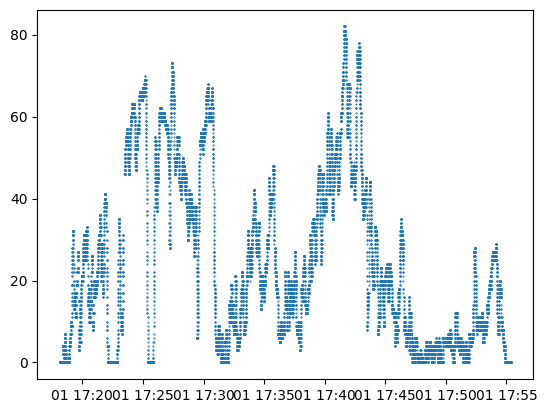

In [8]:
plt.scatter([get_device_time(x) for x in data_np[::, 1]], data_np[::, 13], marker='.', s=1)

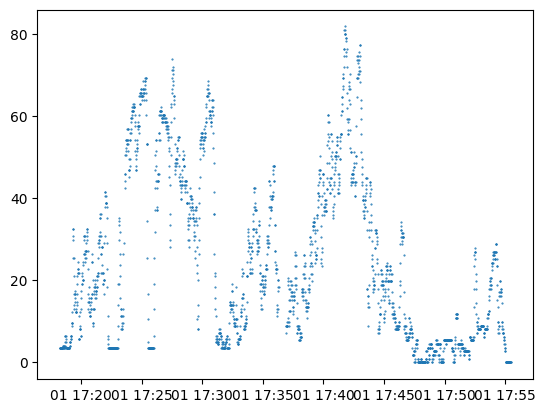

In [10]:
plt.scatter([get_GPS_time(x) for x in gps_time_unique_data_np[::, 0]], gps_time_unique_data_np[::, 4] * 3.6, marker='.', s=1)

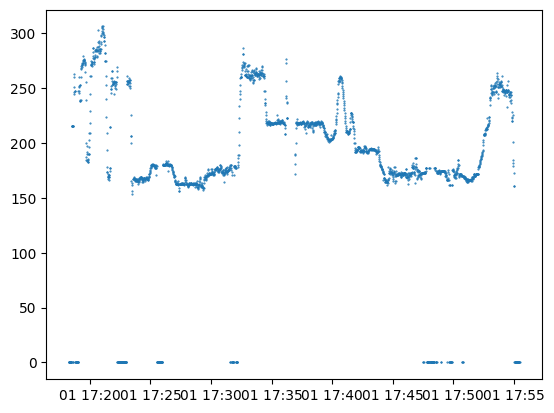

In [10]:
plt.scatter([get_GPS_time(x) for x in gps_time_unique_data_np[::, 0]], gps_time_unique_data_np[::, 7], marker='.', s=1)

In [11]:
zero_bearing_locs = folium.Map(location=[55.848558, 37.583105], zoom_start=20)
for frame in gps_time_unique_data_np[::10]:
    if not frame[7]:
        folium.Marker([frame[3], frame[2]], icon=folium.Icon(color="red")).add_to(zero_bearing_locs)
        print(frame[4], end =', ')
    if get_GPS_time(frame[0]) > datetime.datetime(1900, 1, 1, 17, 36, 0, 0) and get_GPS_time(frame[0]) < datetime.datetime(1900, 1, 1, 17, 37, 0, 0):
        folium.Marker([frame[3], frame[2]], icon=folium.Icon(color="black")).add_to(zero_bearing_locs)
zero_bearing_locs

1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

Причиной возникновения 0 в столбце направления я считаю полную останоку и движение задним ходом

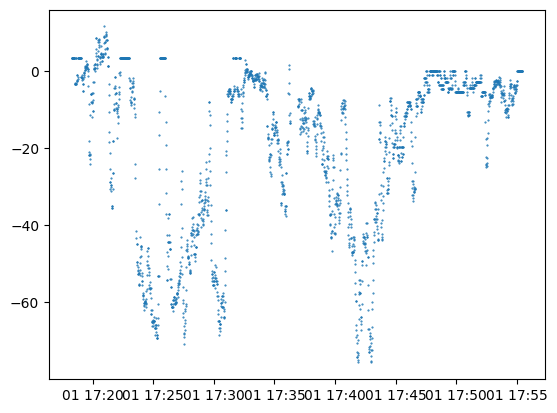

In [12]:
plt.scatter([get_GPS_time(x) for x in gps_time_unique_data_np[::, 0]],
            [3.6 * x[4] * np.cos(x[7] * np.pi / 180) for x in gps_time_unique_data_np],
            marker='.', s=1)
#по х

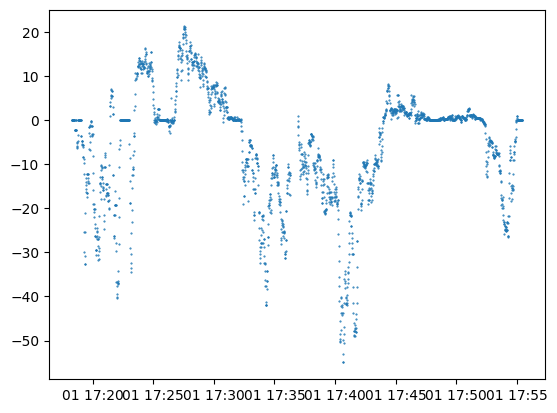

In [13]:
plt.scatter([get_GPS_time(x) for x in gps_time_unique_data_np[::, 0]],
            [3.6 * x[4] * np.sin(x[7] * np.pi / 180) for x in gps_time_unique_data_np],
            marker='.', s=1)
#по у

Задание 1

In [14]:
class two_sensors_one_param_Kalman_filter:

    
    def __init__(self, dispersion_of_1th_s= 1, dispersion_of_2nd_s= 10, init_data_dispersion= 1):
        self.first_s_disp = dispersion_of_1th_s
        self.second_s_disp = dispersion_of_2nd_s
        self.init_disp = init_data_dispersion
        
    def filtrate(self, first_row_TimeToDataPairs, second_row_TimeToDataPairs):
        filter_output = [first_row_TimeToDataPairs[0][1]
                         if first_row_TimeToDataPairs[0][0] < second_row_TimeToDataPairs[0][0]
                         else second_row_TimeToDataPairs[0][1]]
        first_iterator = 1 if first_row_TimeToDataPairs[0][0] <= second_row_TimeToDataPairs[0][0] else 0
        second_iterator = 1 if first_row_TimeToDataPairs[0][0] >= second_row_TimeToDataPairs[0][0] else 0
        current_dispersion = self.init_disp
        Kalman = None
        while (first_iterator < len(first_row_TimeToDataPairs)
               and second_iterator < len(second_row_TimeToDataPairs)):
            if first_row_TimeToDataPairs[first_iterator][0] < second_row_TimeToDataPairs[second_iterator][0]:
                #действия если по прорядку ит1
                
                Kalman = ((current_dispersion + (first_row_TimeToDataPairs[first_iterator][1] - filter_output[-1])**2) /
                          (self.first_s_disp + (first_row_TimeToDataPairs[first_iterator][1] - filter_output[-1])**2))
                current_dispersion = self.first_s_disp * Kalman  
                filter_output.append(filter_output[-1] + Kalman * (first_row_TimeToDataPairs[first_iterator][1] - filter_output[-1]))
                
                first_iterator += 1
            elif first_row_TimeToDataPairs[first_iterator][0] > second_row_TimeToDataPairs[second_iterator][0]:
                #действия если по прорядку ит2
                
                Kalman = ((current_dispersion + (second_row_TimeToDataPairs[second_iterator][1] - filter_output[-1])**2) /
                          (self.second_s_disp + (current_dispersion + (second_row_TimeToDataPairs[second_iterator][1] - filter_output[-1])**2)))
                current_dispersion = self.second_s_disp * Kalman
                filter_output.append(filter_output[-1] + Kalman * (second_row_TimeToDataPairs[second_iterator][1] - filter_output[-1]))
                
                second_iterator += 1
            else:
                #действия если два события одновременны
                
                both_dispersion = self.first_s_disp * self.second_s_disp / (self.first_s_disp + self.second_s_disp)
                both_data = (first_row_TimeToDataPairs[first_iterator][1] * self.second_s_disp / (self.first_s_disp + self.second_s_disp) +
                             second_row_TimeToDataPairs[second_iterator][1] * self.first_s_disp / (self.first_s_disp + self.second_s_disp))
                Kalman = ((current_dispersion+ (both_data - filter_output[-1])**2) /
                          (both_dispersion + (current_dispersion+ (both_data - filter_output[-1])**2)))               
                current_dispersion = both_dispersion * Kalman                
                filter_output.append(filter_output[-1] + Kalman * (both_data - filter_output[-1]))
                
                first_iterator += 1
                second_iterator += 1
        #когда один из наборов пройден
        the_only_row = []
        the_only_sens_disp = None
        if first_iterator == len(first_row_TimeToDataPairs):
            if second_iterator == len(second_row_TimeToDataPairs):
                return filter_output
            else:
                the_only_row = second_row_TimeToDataPairs[second_iterator::]
                the_only_sens_disp = self.second_s_disp
        else:
            the_only_row = first_row_TimeToDataPairs[first_iterator::]
            the_only_sens_disp = self.first_s_disp
        #действия с остатком данных
        for Pair in the_only_row:

            Kalman = ((current_dispersion + (Pair[1] - filter_output[-1])**2) /
                      (the_only_sens_disp + (current_dispersion + (Pair[1] - filter_output[-1])**2)))
            current_dispersion = the_only_sens_disp * Kalman
            filter_output.append(filter_output[-1] + Kalman * (Pair[1] - filter_output[-1]))

        return filter_output

In [69]:
obd_time_error = np.mean([get_GPS_time(x[0]) - get_device_time(x[1]) for x in gps_time_unique_data_np])
print(obd_time_error)
obd_pairs = [[get_device_time(x[0]) + obd_time_error, x[1]] for x in data_np[::, 1:14:12]]
gps_pairs = [[get_GPS_time(x[0]), x[1] * 3.6] for x in gps_time_unique_data_np[::, 0:5:4]]
print(obd_pairs[0])
print(gps_pairs[0])

0:00:07.244488
[datetime.datetime(1900, 1, 1, 17, 18, 15, 916488), 0.0]
[datetime.datetime(1900, 1, 1, 17, 18, 15), 3.6]


In [70]:
KF = two_sensors_one_param_Kalman_filter(0.25 , 2 , 0.5)
most_predicted_speed = KF.filtrate(obd_pairs, gps_pairs)

merged_timeline= [x[0] for x in obd_pairs]
merged_timeline.extend(y for y in [x[0] for x in gps_pairs] if y not in merged_timeline)
merged_timeline.sort()

OverflowError: (34, 'Result too large')

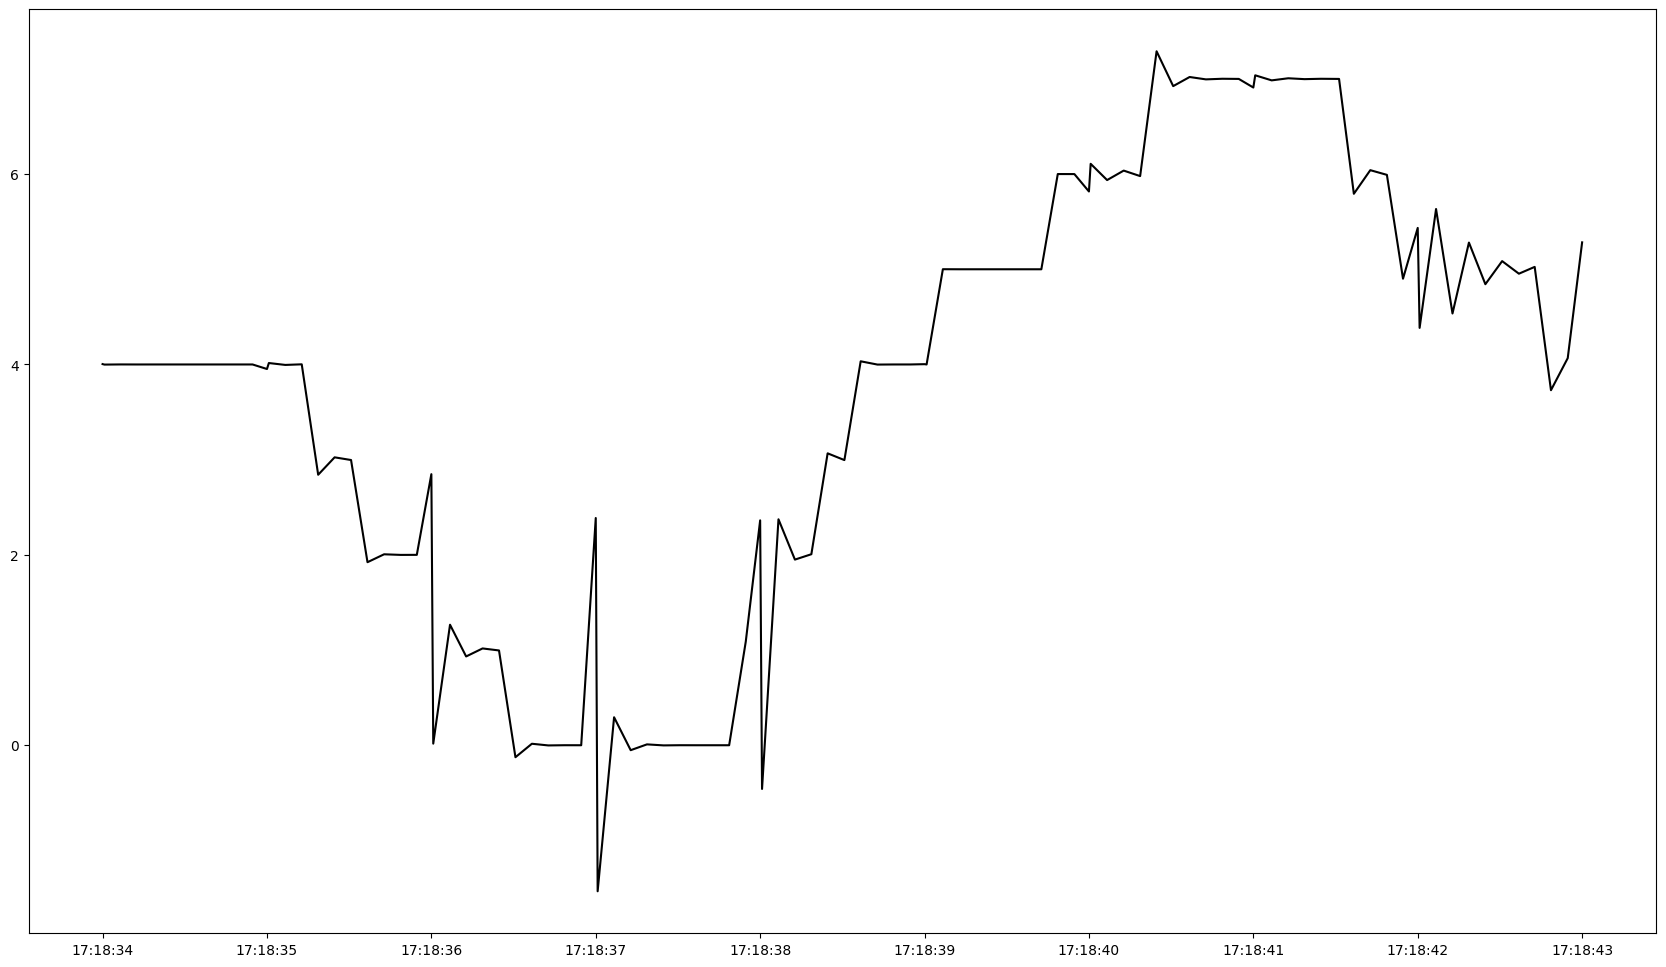

In [57]:
plt.figure(figsize=(21,12))
plt.plot(merged_timeline[200:300], most_predicted_speed[200:300], c = 'k')


In [58]:
gps_pairs_17_35to45_no_data= []
for x in gps_pairs:
    if (x[0] < datetime.datetime(1900, 1, 1, 17, 25, 0, 0) 
        or 
        x[0] > datetime.datetime(1900, 1, 1, 17, 35, 0, 0)):
        gps_pairs_17_35to45_no_data.append(x)

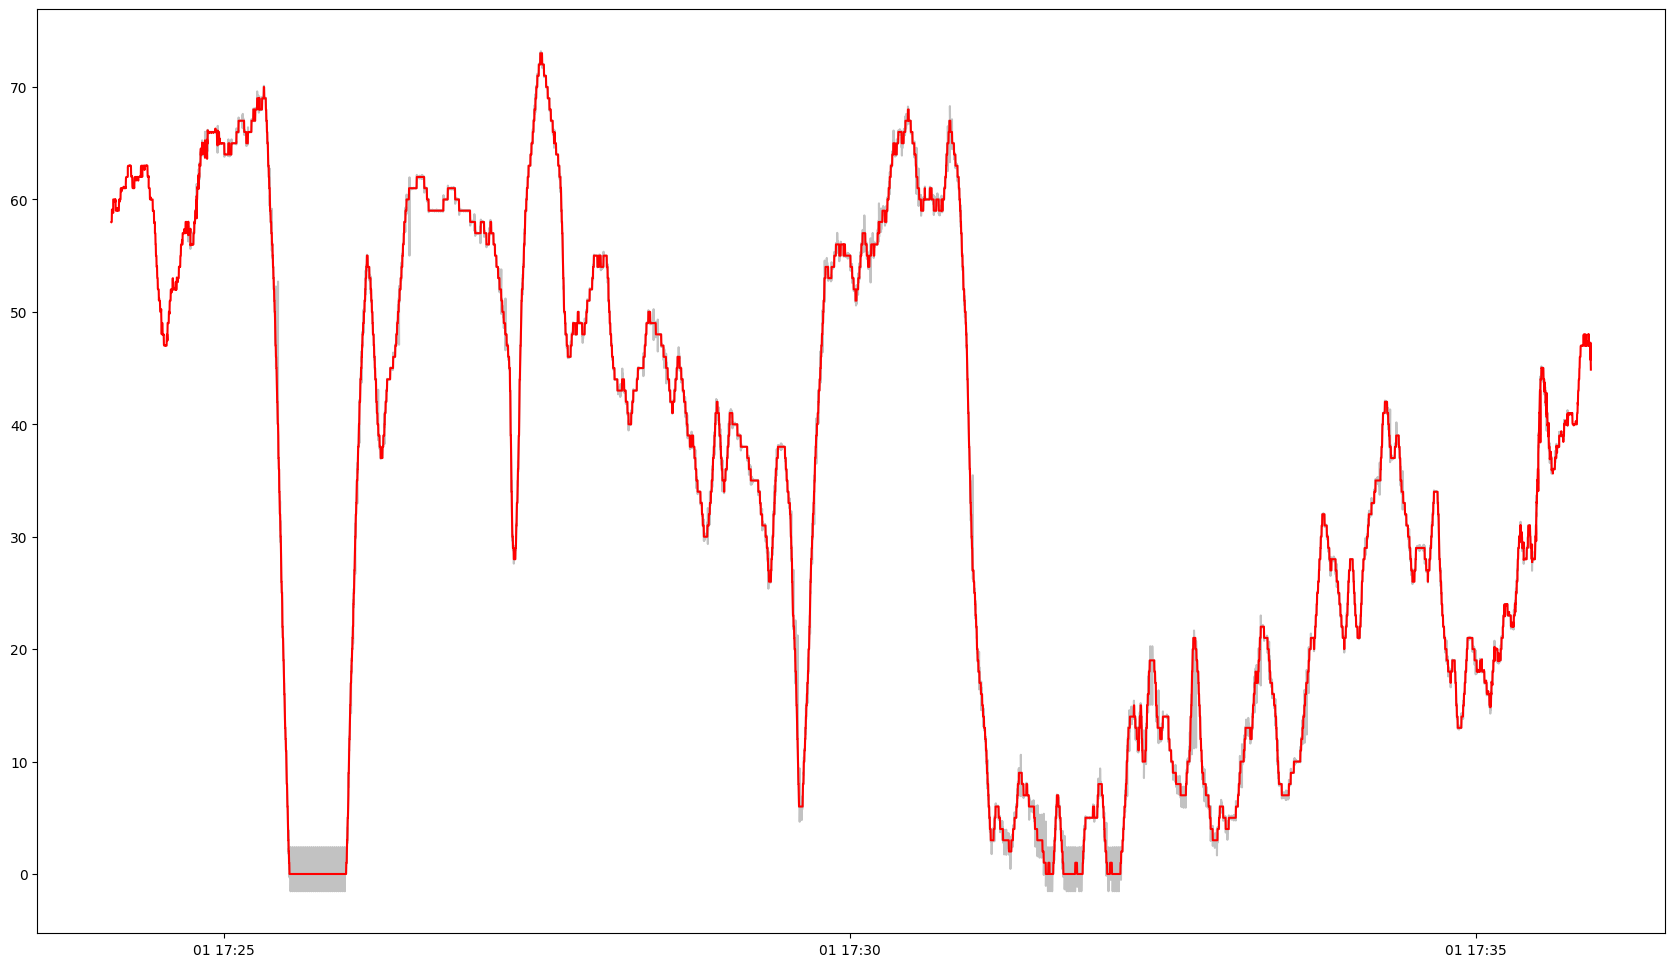

In [62]:
KF_skip1 = two_sensors_one_param_Kalman_filter(0.5, 1, 0.1)
MPS_skip1 = KF_skip1.filtrate(obd_pairs, gps_pairs_17_35to45_no_data)

ts = [x[0] for x in obd_pairs]
ts.extend(y for y in [x[0] for x in gps_pairs_17_35to45_no_data] if y not in ts)
ts.sort()

plt.figure(figsize=(21,12))
plt.plot(merged_timeline[4200:11500], most_predicted_speed[4200:11500], c = '#c2c2c2')
plt.plot(ts[3800:11000], MPS_skip1[3800:11000],c = 'r')

In [63]:
obd_pairs_17_40to50_no_data= []
for x in obd_pairs:
    if (x[0] < datetime.datetime(1900, 1, 1, 17, 40, 0, 0) 
        or 
        x[0] > datetime.datetime(1900, 1, 1, 17, 50, 0, 0)):
        obd_pairs_17_40to50_no_data.append(x)

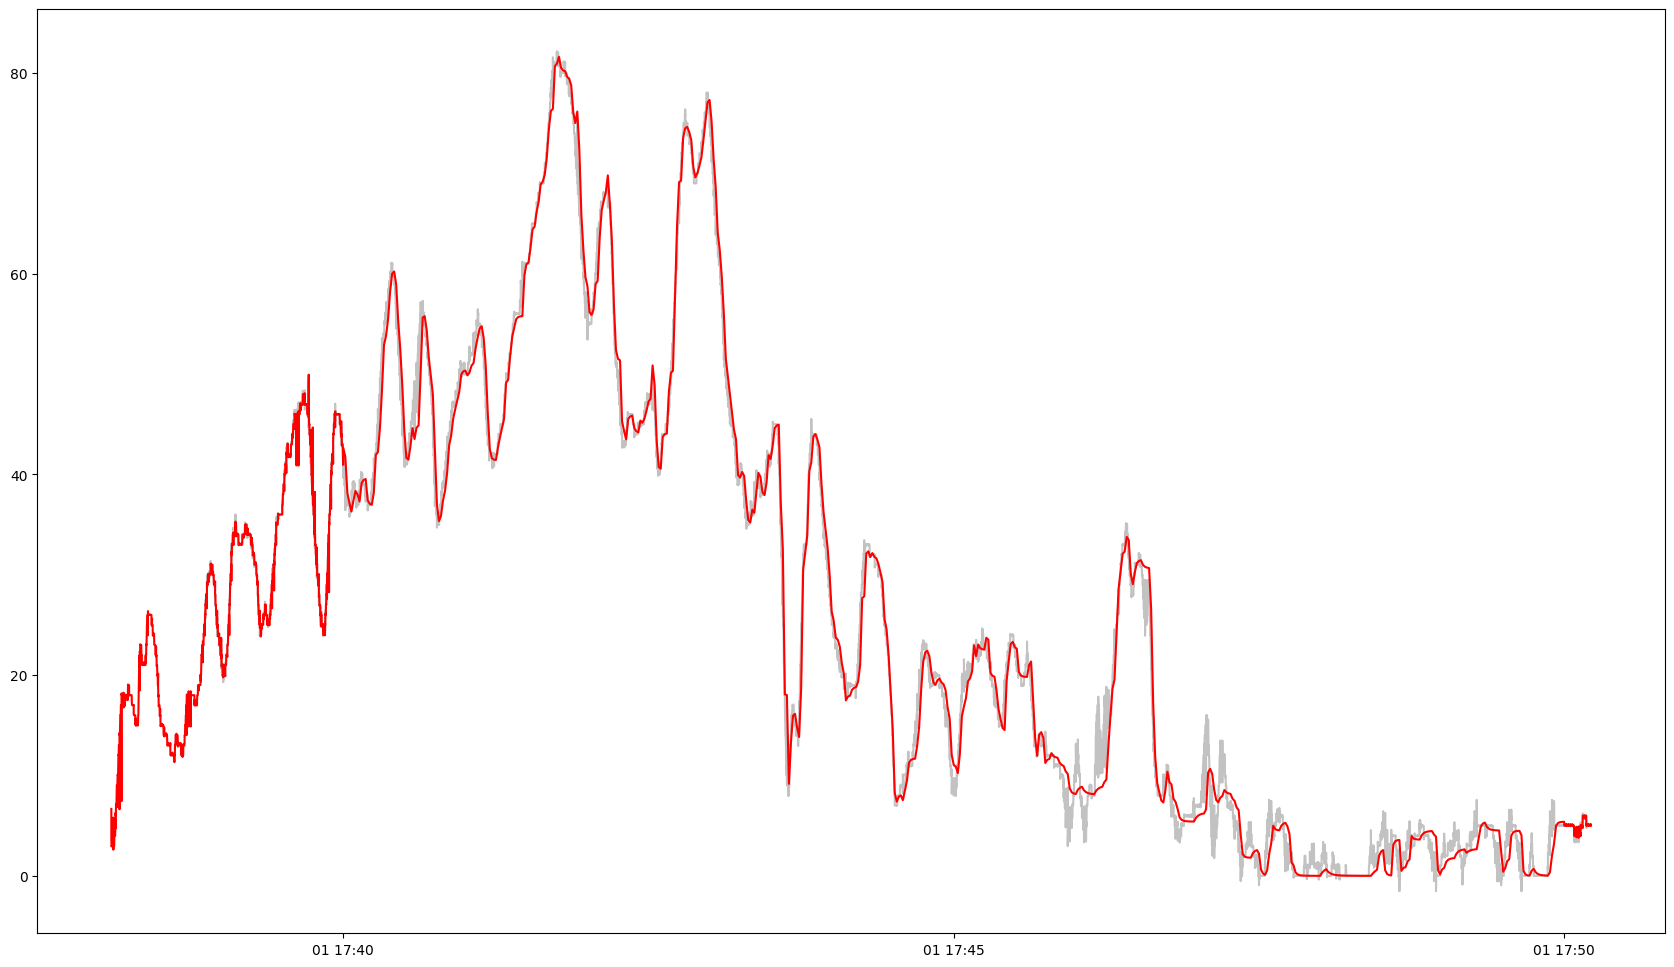

In [61]:
KF_skip2 = two_sensors_one_param_Kalman_filter(0.5, 1, 1)
MPS_skip2 = KF_skip2.filtrate(obd_pairs_17_40to50_no_data, gps_pairs)

ts2 = [x[0] for x in gps_pairs]
ts2.extend(y for y in [x[0] for x in obd_pairs_17_40to50_no_data] if y not in ts2)
ts2.sort()

plt.figure(figsize=(21,12))

plt.plot(merged_timeline[13500:21000], most_predicted_speed[13500:21000], c = '#c2c2c2')
plt.plot(ts2[13000:15000], MPS_skip2[13000:15000], c = 'r')

Задание 2

In [23]:
class Move_Sense_Kalman_filter:

    
    def __init__(self, move_dispersion, sense_dispersion, init_dispersion):
        self.move_dispersion = move_dispersion
        self.sense_dispersion = sense_dispersion
        self.current_dispersion = init_dispersion
        
    def get_FiltratedValues_ValuesBeforeSense_DispersionsOnStep(self, Row_of_triplets_Time_SpeedProjMpS_SencedPosMetersFromStart):
        FILTRATED_POS = [0]
        PRE_SENSE_VALUES= [0]
        DISPERSIONS = [self.current_dispersion]
        
        for step in Row_of_triplets_Time_SpeedProjMpS_SencedPosMetersFromStart:
            #move part
            
            calc_pos_E = FILTRATED_POS[-1] + step[1]
            Kalman = (DISPERSIONS[-1] + (step[1])**2) / ((DISPERSIONS[-1] + (step[1])**2) + self.move_dispersion)
            pre_sense_disp = Kalman * self.move_dispersion 
            PRE_SENSE_VALUES.append(FILTRATED_POS[-1] + Kalman * (calc_pos_E - FILTRATED_POS[-1]))
            
            #sense part

            Kalman = ((pre_sense_disp + (PRE_SENSE_VALUES[-1] - step[2])**2) /
                      ((pre_sense_disp + (PRE_SENSE_VALUES[-1] - step[2])**2) + self.sense_dispersion))
            DISPERSIONS.append(Kalman * self.sense_dispersion)
            FILTRATED_POS.append(PRE_SENSE_VALUES[-1] + Kalman * (step[2] - PRE_SENSE_VALUES[-1]))
            #print(FILTRATED_POS[-1],'=',PRE_SENSE_VALUES[-1] ,' + ', Kalman, ' * (', step[2], ' - ', PRE_SENSE_VALUES[-1], ')')
        return (FILTRATED_POS[1:], PRE_SENSE_VALUES[1:], DISPERSIONS[1:])

In [24]:
MSK_input_TRPTS = []
start_pos = gps_time_unique_data_np[0][2]
for frame in gps_time_unique_data_np:
    time = get_GPS_time(frame[0])
    speed_proj = frame[4] * np.sin(frame[7] * np.pi / 180)
    sensed_pos = (frame[2] - start_pos) * 63642.78
    MSK_input_TRPTS.append((time, speed_proj, sensed_pos))

In [25]:
LTT_move_KF = Move_Sense_Kalman_filter(10, 1, 1)
FP, PS, D = LTT_move_KF.get_FiltratedValues_ValuesBeforeSense_DispersionsOnStep(MSK_input_TRPTS)
Time = [get_GPS_time(x[0]) for x in gps_time_unique_data_np]

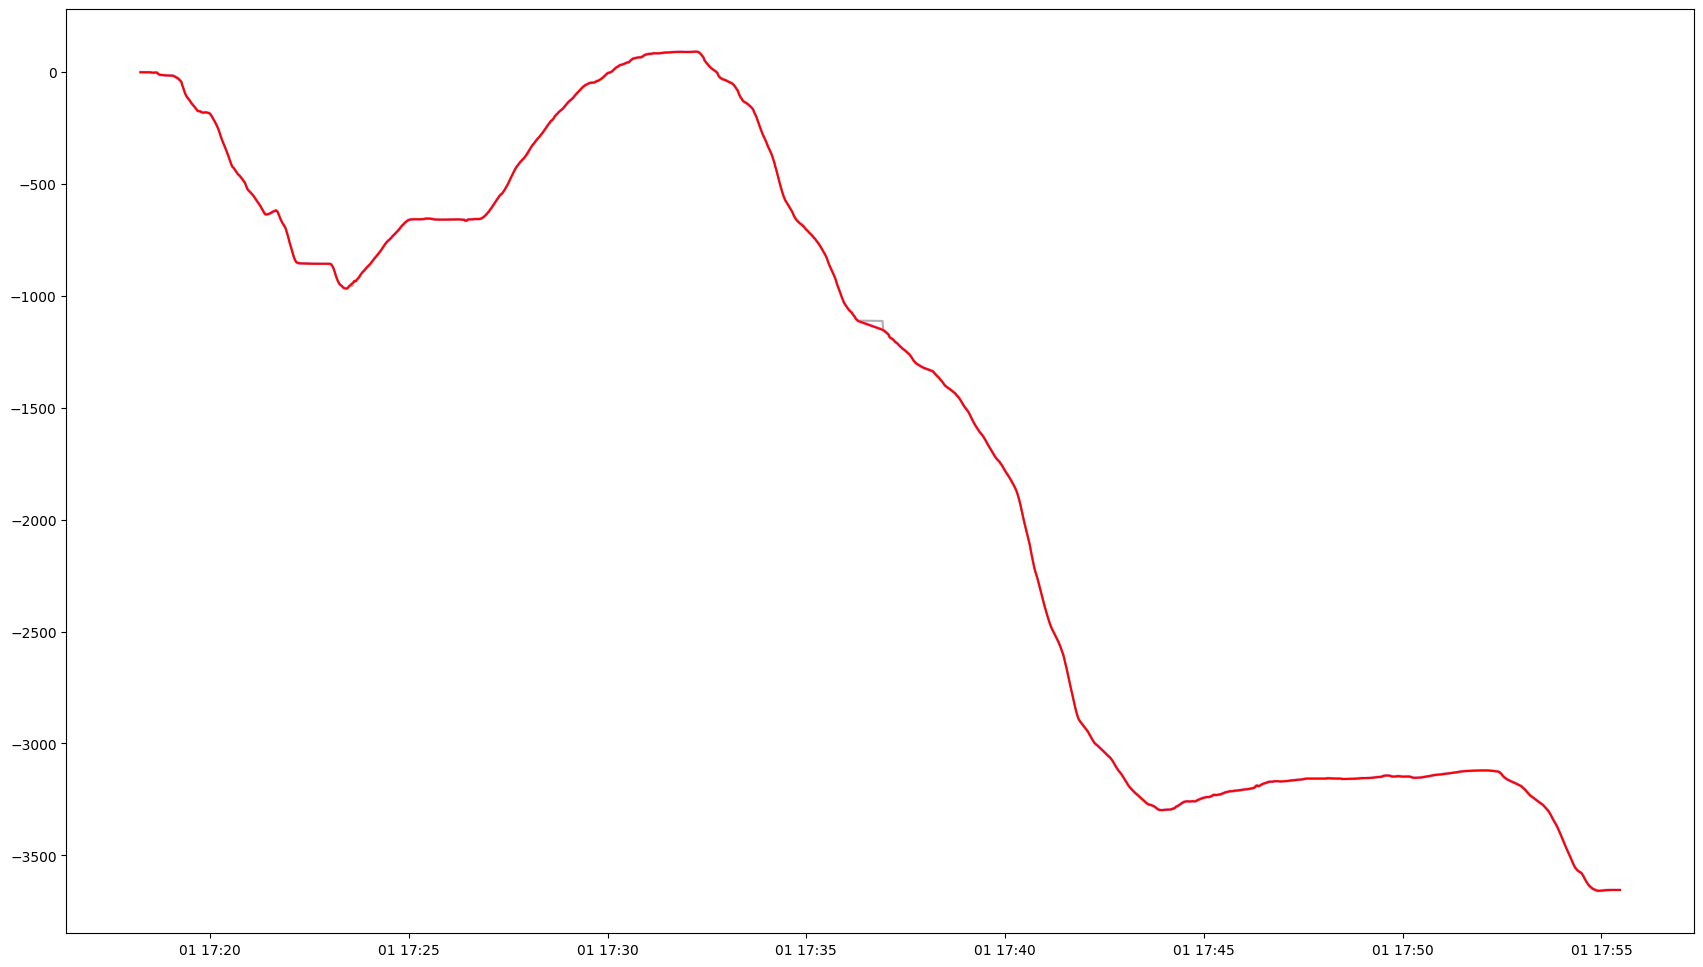

In [26]:

plt.figure(figsize=(21,12))
plt.plot(Time, [3 * np.sqrt(D[i]) + FP[i] for i in range(len(Time))], c = '#deaaff')
plt.plot(Time, [-3 * np.sqrt(D[i]) + FP[i] for i in range(len(Time))], c = '#deaaff')
plt.plot(Time, PS, c = '#b1adb3')
plt.plot(Time, FP, c = 'r')

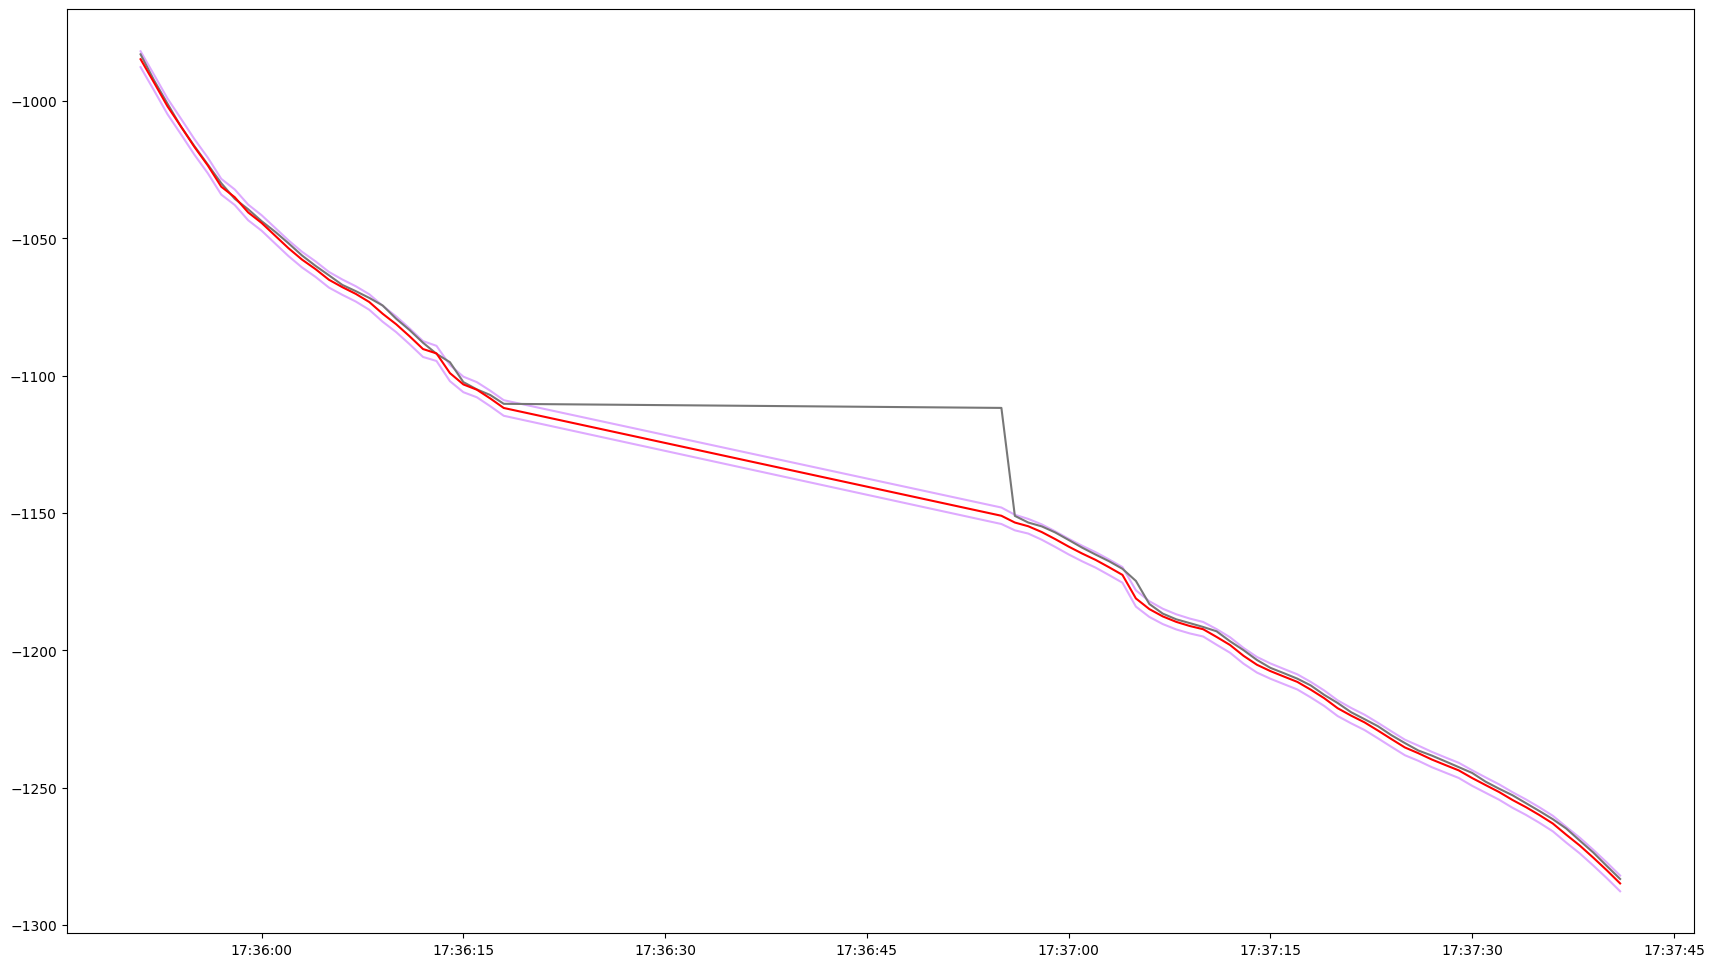

In [27]:
plt.figure(figsize=(21,12))
plt.plot(Time[1050:1125], [3 * np.sqrt(D[i]) + FP[i] for i in range(len(Time))][1050:1125], c = '#deaaff')
plt.plot(Time[1050:1125], [-3 * np.sqrt(D[i]) + FP[i] for i in range(len(Time))][1050:1125], c = '#deaaff')
plt.plot(Time[1050:1125], PS[1050:1125], c = '#777777')
plt.plot(Time[1050:1125], FP[1050:1125], c = 'r')


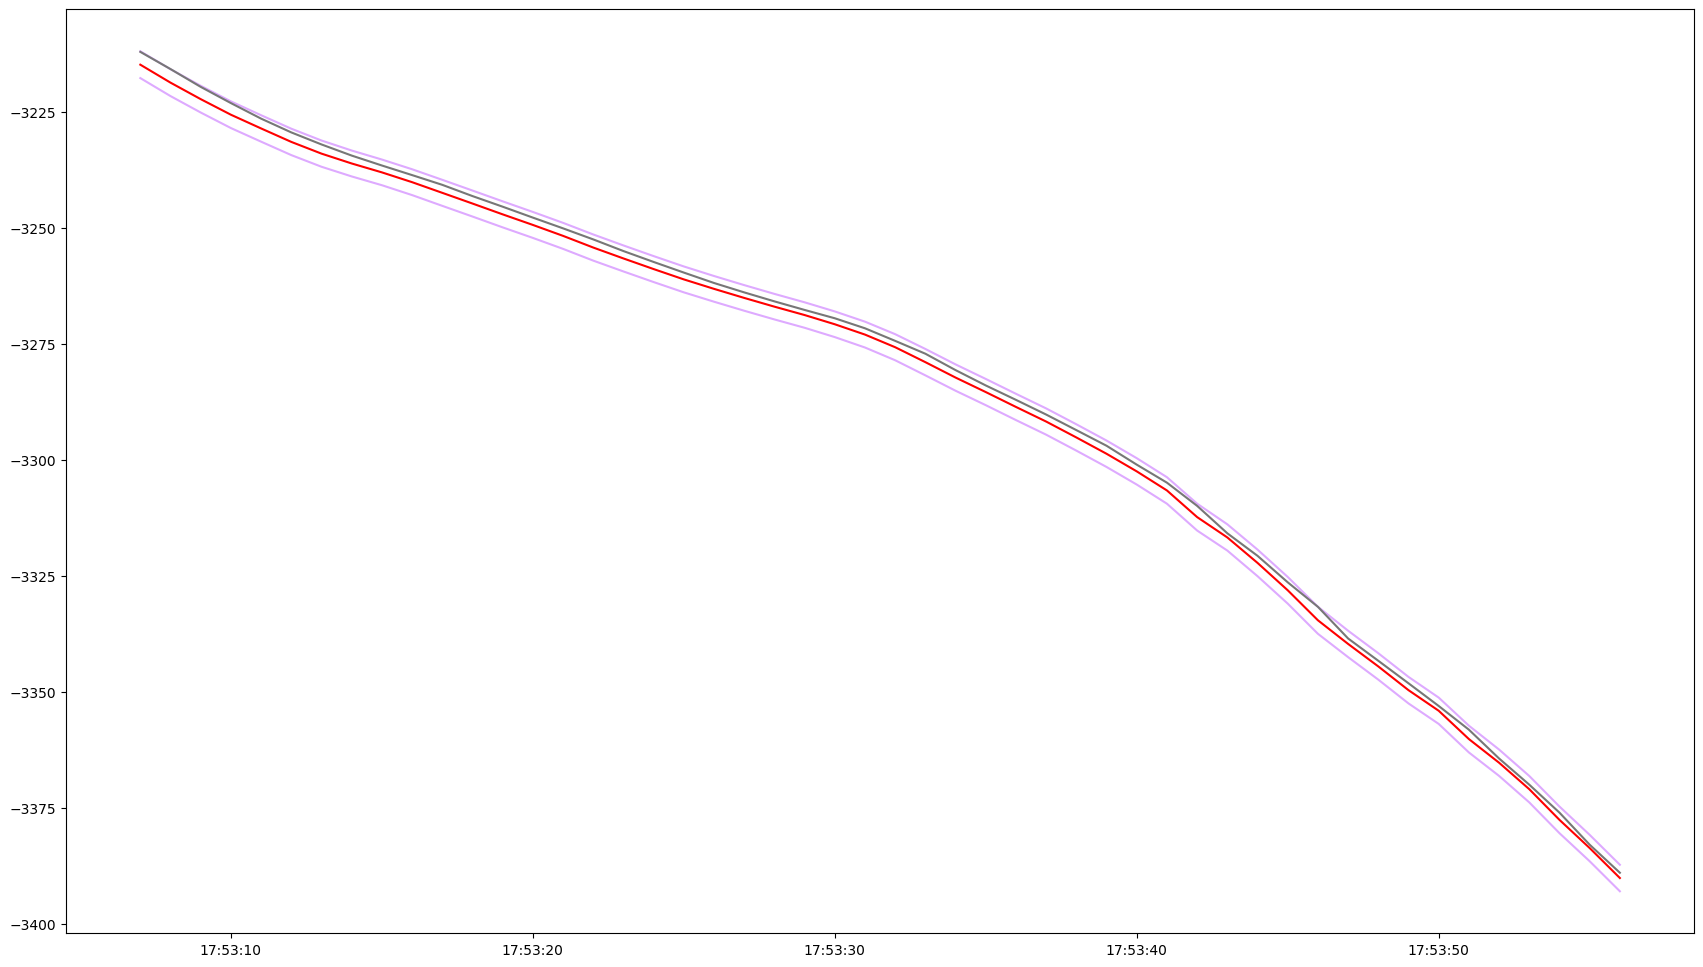

In [72]:
plt.figure(figsize=(21,12))
plt.plot(Time[2050:2100], [3 * np.sqrt(D[i]) + FP[i] for i in range(len(Time))][2050:2100], c = '#deaaff')
plt.plot(Time[2050:2100], [-3 * np.sqrt(D[i]) + FP[i] for i in range(len(Time))][2050:2100], c = '#deaaff')
plt.plot(Time[2050:2100], PS[2050:2100], c = '#777777')
plt.plot(Time[2050:2100], FP[2050:2100], c = 'r')